In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bissecao(f, a, b, xtol=1e-8, ytol=1e-8):
    niter=0
    while abs(a-b)>xtol and abs(f((a+b)/2))>ytol:
        m = (a+b)/2
        if f(m)*f(a)<0:
            b = m
        else:
            a = m
        niter+=1
    m = (a+b)/2
    return m, niter

# Teste 2

Neste teste, iremos fazer alguns gráficos do erro ao chamar a função arcoseno,
implementanda no teste anterior.

$$ $$

Este teste será muito mais "discursivo":
- ele contém diversas caixas para você comentar seus gráficos;
- os próprios gráficos permitem muito mais variações do que `assert`s.

Este momento de "análise" é muito importante nesta disciplina.
Mais do que fazer (o seu computador fazer) muitas contas,
queremos **entender o que estas contas nos dizem**.

In [3]:
def arcoseno(y, xtol=1e-8, ytol=1e-8):
    """Arco seno, via bisseção, dadas as tolerâncias (absolutas) em x e em y.
    Retorna um par  (x,n)  tal que  sin(x) ~ y, e onde  n  é o número de bisseções realizadas."""
    def aux(x): return np.sin(x)-y
    return bissecao(aux,-np.pi/2,np.pi/2,xtol,ytol)

## Questão 1: Erros com relação à raiz correta

Faça um gráfico do erro absoluto do arcoseno de 0.5,
ao variar a tolerância em $x$, em escala "natural".

Obs: Você pode usar `np.arcsin()` para saber o valor "exato" (para seu computador) do arco seno.

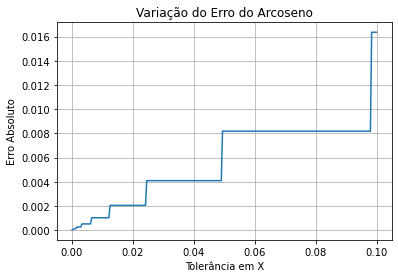

In [4]:
tols = np.linspace(0.0001, 0.1, num=250)
m = np.empty(len(tols))
for i, tols_i in enumerate(tols):
    m[i], _ = abs(arcoseno(0.5,xtol=tols_i) - np.arcsin(0.5))
#Eixos
plt.xlabel("Tolerância em X")
plt.ylabel("Erro Absoluto")
#Plot
plt.title("Variação do Erro do Arcoseno")
plt.plot(tols,m)
plt.grid()

Porque este comportamento é esperado?

Podemos visualizar que o erro absoluto converge para 0 quanto menor a tolerância do erro de x (xtol) for, o que é esperado do método da bisseção, e a natureza do gráfico ter essa "cara" de uma escada se da pelo método da bisseção que ao se diminuir continuamente a tolerancia do erro em x (xtol) haverá um ponto critico onde o tamanho do último intervalo iterado será igual a xtol e assim para um xtol imediatamente menor que ele ocorrerá uma nova iteração com uma nova raiz e um novo erro absoluto.

Refaça este gráfico, em outra escala.

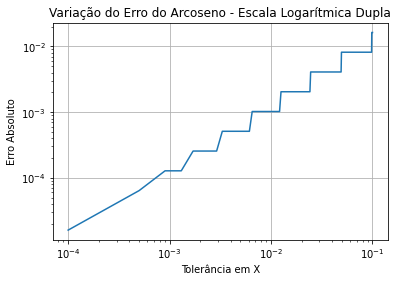

In [5]:
#Eixos
plt.title("Variação do Erro do Arcoseno - Escala Logarítmica Dupla")
plt.xlabel("Tolerância em X")
plt.ylabel("Erro Absoluto")
plt.loglog(tols,m)
plt.grid();

Explique porque você escolheu esta combinação de escalas para $x$ e $y$.

Foi escolhido essa combinação para explicitar a relação de proporcionalidade entre a diminuição do xtol e o seu efeito na diminuição do erro absoluto, impacto esse que pode ser ajustado a uma reta.

## Questão 2: Erros em função da tolerância em $y$

Refaça um dos gráficos de erro, agora variando a tolerância em $y$.

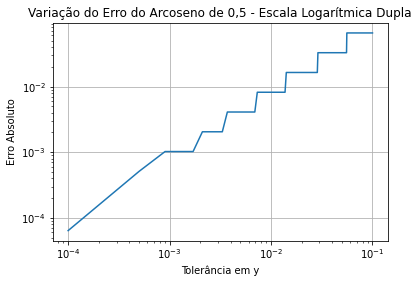

In [6]:
tols = np.linspace(0.0001, 0.1, num=250)
n = np.empty(len(tols))
for i, tols_i in enumerate(tols):
    n[i], _ = abs(arcoseno(0.5,ytol=tols_i) - np.arcsin(0.5))
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
#Plot
plt.title("Variação do Erro do Arcoseno de 0,5 - Escala Logarítmica Dupla")
plt.loglog(tols,n)
plt.grid();

Faça agora um gráfico mudando para o arco seno de 0.9.

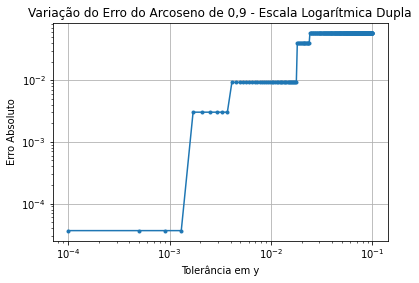

In [7]:
tols = np.linspace(0.0001, 0.1, num=250)
k = np.empty(len(tols))
for i, tols_i in enumerate(tols):
    k[i], _ = abs(arcoseno(0.9,ytol=tols_i) - np.arcsin(0.9))
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
#Plot
plt.title("Variação do Erro do Arcoseno de 0,9 - Escala Logarítmica Dupla")
plt.loglog(tols,k,marker=".")
plt.grid()

O que aconteceu?
Comente.

Podemos ver novamente que a diminuição do valor de ytol leva a uma diminuição do erro absoluto porem desta vez não há proporcionalidade entre essas diminuições devido ao fato do método da bissção comparar o valor da função no ponto medio, sendo assim a função que está sendo analisada influencia qual será o ponto critico onde ocorrerá uma nova iteração.

### Bônus

Nos gráficos e nos testes, começamos com tolerância `1e-4`, e não de zero.
Explique o que aconteceria se começássemos em zero.

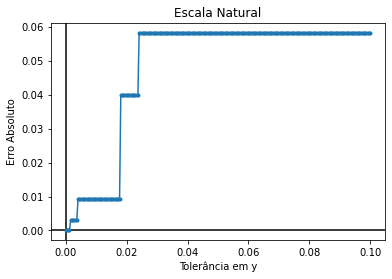

In [8]:
#celula teste1
tols = np.linspace(0, 0.1, num=250)
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
plt.title("Escala Natural")
plt.axhline(color="black")
plt.axvline(color="black")
plt.plot(tols,k,marker='.');

<ipython-input-9-4b1aa5d40224>:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogx(tols,k,marker='.');


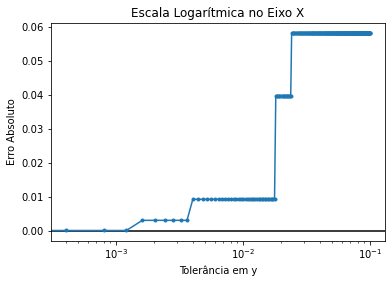

In [9]:
#celula teste2
tols = np.linspace(0, 0.1, num=250)
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
plt.title("Escala Logarítmica no Eixo X")
plt.axhline(color="black")
plt.axvline(color="black")
plt.semilogx(tols,k,marker='.');

<ipython-input-10-776f5aafbf45>:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy(tols,k,marker='.');


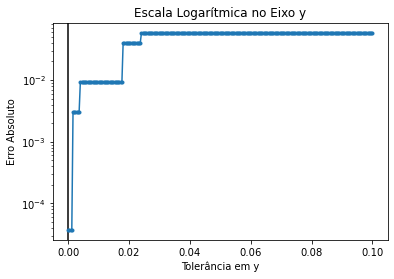

In [10]:
#celula teste3
tols = np.linspace(0, 0.1, num=250)
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
plt.title("Escala Logarítmica no Eixo y")
plt.axhline(color="black")
plt.axvline(color="black")
plt.semilogy(tols,k,marker='.');

<ipython-input-11-69f23bc05564>:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.loglog(tols,k,marker='.');


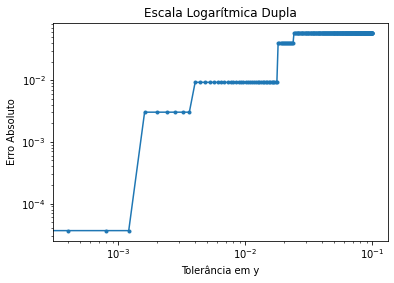

In [11]:
#celula teste4
tols = np.linspace(0, 0.1, num=250)
#Eixos
plt.xlabel("Tolerância em y")
plt.ylabel("Erro Absoluto")
plt.title("Escala Logarítmica Dupla")
plt.axhline(color="black")
plt.axvline(color="black")
plt.loglog(tols,k,marker='.');

Não acontece nada para o caso do gráfico em escala "natural" mas o computador não plota o ponto inicial de ytol=0 em escala loglog ou semilog pois a função log não permite o número 0.

## Questão 3: Erros em função do valor de $y$

Faça o gráfico do erro da resposta,
ao variar $y$ no intervalo $[0.1, 0.9]$, com as tolerâncias fixas.

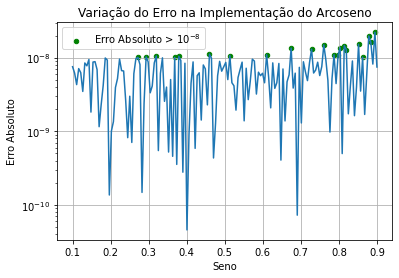

In [12]:
ys = np.linspace(0.1, 0.9, num=150)
n = np.empty(len(ys))
l=[]
r=[]
for i, ys_i in enumerate(ys):
    n[i], _ = abs(arcoseno(y = ys_i,xtol=1e-8, ytol=1e-8) - np.arcsin(ys_i))
    if n[i]>1e-8:
        l.append(n[i])
        r.append(ys_i)
#Eixos
plt.xlabel("Seno")
plt.ylabel("Erro Absoluto")
#Plot
plt.title("Variação do Erro na Implementação do Arcoseno")
plt.semilogy(ys, n)
plt.scatter(r,l, label='Erro Absoluto > $10^{-8}$', color='green', marker='.',s=80)
plt.legend()
plt.grid()

Há valores cujo erro é maior do que `1e-8`.
Porquê?

Sim, pois sempre haverá erros númericos de forma a influenciar no valor final da resposta. Esses erros podem ser de natureza da aproximação feita para representar números reais que o computador não consegue representar ou da acumulação desses erros de representação devido as varias operações feitas. E esses erros levam a resposta a ter um erros na casa a qual a maquina deveria garantir certaza.

Repita para o intervalo $[0.9, 0.999]$

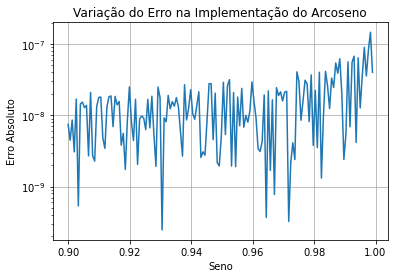

In [13]:
ys = np.linspace(0.9, 0.999, num=150)
n = np.empty(len(ys))
s=[]
for i, ys_i in enumerate(ys):
    n[i], _ = abs(arcoseno(y = ys_i) - np.arcsin(ys_i))
    s.append(arcoseno(y=ys_i))
#Eixos
plt.xlabel("Seno")
plt.ylabel("Erro Absoluto")
#Plot
plt.title("Variação do Erro na Implementação do Arcoseno")
plt.semilogy(ys, n)
plt.grid();


## Questão 4: Número de iterações

Faça o gráfico com o número de iterações da bisseção no intervalo $[0.9, 0.999]$.

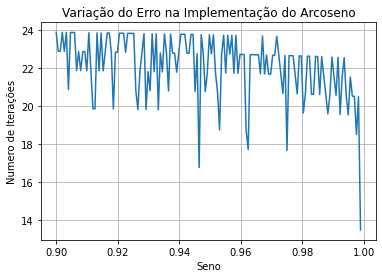

In [14]:
ys = np.linspace(0.9,0.999, num=150)
n = np.empty(len(ys))
niters = np.empty(len(ys))
for i, ys_i in enumerate(ys):
    n[i], niters[i] = abs(arcoseno(y = ys_i) - np.arcsin(ys_i))
#Eixos
plt.xlabel("Seno")
plt.ylabel("Numero de Iterações")
#Plot
plt.title("Variação do Erro na Implementação do Arcoseno")
plt.plot(ys,niters)
plt.grid()

Como esse gráfico ajuda a explicar o aumento do erro observado na questão 3?

Esse grafico explicita que para valores suficientemente proxímos de 1, o numero de iterações cai rapidamente o que corrobora para a explicação de que para esses valores o intervalo está suficientemente pequeno porem pouco acurado a resposta e essa incerteza no valor do arcoseno, incertezas essas representadas pelo aumento do erro absoluto em comparação com o valor real do arcoseno na extremidade do intervalo. 